# **EDA (Exploratory Data Analysis)**

In [1]:
import zipfile

# Path to the zip file
zip_file_path = '../data/rossmann-store-sales.zip'

# The directory where extract the files
extract_dir = '../data'

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the files to the specified directory
    zip_ref.extractall(extract_dir)

## Dataset Overview
The dataset consists of historical sales data for Rossman stores, including information such as store type, assortment, promotions, and more.
- Features include store ID, date, sales, customers, promotional activities, and store characteristics.
- The target variable is the sales figure for each store on a given day.

Hence in this notebook I will dive into the dataset to understand the distribution of key variables, trends over time, and relationships between features.

### Load Data

In [2]:
### Load store dataset
import pandas as pd
store_df = pd.read_csv('../data/store.csv')
print(f"Store_df shape: {store_df.shape}")
store_df.head()

Store_df shape: (1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
### Load train dataset and merge with store dataset
train_df = pd.read_csv('../data/train.csv')
print(f"Train_df shape: {train_df.shape}")
train_df.head()

/tmp/ipykernel_15239/3036017700.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/train.csv')


Train_df shape: (1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Train Datasets

In [4]:
# Merge train and store datasets for better predictions
train_store_df = pd.merge(train_df, store_df, how='left', on='Store')
print(f"Train_store_df shape: {train_store_df.shape}")
train_store_df.head()

Train_store_df shape: (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# load test dataset
test_df = pd.read_csv('../data/test.csv')
print(f"Test_df shape: {test_df.shape}")
test_df.head()

Test_df shape: (41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


### Test Datasets

In [6]:
# Merge test and store datasets for better predictions
test_store_df = pd.merge(test_df, store_df, on='Store')
print(f"Test_store_df shape: {test_store_df.shape}")
test_store_df.head()

Test_store_df shape: (41088, 17)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


### Data cleaning

In [7]:
# Import the Class to data processing
import os, sys
sys.path.append(os.path.abspath('../src'))

from preprocessing import missing_data_summary, plot_outliers_boxplot, scatter_plot,\
    plot_outliers_boxplot,cap_all_outliers, plot_decile_pie_chart, correlation_matrix
# Check for missing data
missing_data_summary(train_store_df)

,Missing Count,Percentage (%)
Promo2SinceYear,508031,49.943620
Promo2SinceWeek,508031,49.943620
PromoInterval,508031,49.943620
CompetitionOpenSinceMonth,323348,31.787764
CompetitionOpenSinceYear,323348,31.787764
CompetitionDistance,2642,0.259730


### Replace missing columns

When `Promo2` is 0, `Promo2SinceWeek`, `Promo2SinceYear` and `PromoInterval` would be empty. The null value should be fill with trival value that not same any exsiting value (e.g. 0) instead of median or mode.

In [8]:
promo2_column=['Promo2','Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
train_store_df[promo2_column][train_store_df.Promo2SinceWeek.isna()]

,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,NaN,NaN,NaN
3,0,NaN,NaN,NaN
4,0,NaN,NaN,NaN
5,0,NaN,NaN,NaN
6,0,NaN,NaN,NaN
...,...,...,...,...
1017201,0,NaN,NaN,NaN
1017203,0,NaN,NaN,NaN
1017205,0,NaN,NaN,NaN
1017206,0,NaN,NaN,NaN


In [9]:
train_store_df[promo2_column] = train_store_df[promo2_column].fillna(0)

Let's `assumeCompetitionDistance` is empty when there is no competition. And also `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` always empty together. The null value should be fill with trival value that not same any exsiting value (e.g. 0) instead of median or mode.

In [10]:
train_store_df[train_store_df.CompetitionDistance.isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0


In [11]:
competition_column=['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']
train_store_df[competition_column] = train_store_df[competition_column].fillna(0)

In [12]:
# Check unique values of the columns
train_store_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       13
CompetitionOpenSinceYear        24
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64

In [13]:
# There should be 4 unique values for the column 'StateHoliday' but there are 5 unique values
train_store_df['StateHoliday'].value_counts()

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [14]:
# Replace '0' with integer 0
train_store_df['StateHoliday'] = train_store_df['StateHoliday'].replace('0', 0)
test_store_df['StateHoliday'] = test_store_df['StateHoliday'].replace('0', 0)

In [15]:
train_store_df.StateHoliday.value_counts()

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64

**When the store is closed the sale is zero, so it's more efficient to remove rows with store zero.**

In [16]:
reduced_train_store_df = train_store_df[train_store_df['Sales'] > 0].copy()
reduced_train_store_df.shape

(844338, 18)

In [17]:
# Convert 'Date' column to datetime format
reduced_train_store_df['Date'] = pd.to_datetime(reduced_train_store_df['Date'])

# Extracting year and month from the 'Date' column
reduced_train_store_df['Year'] = reduced_train_store_df['Date'].dt.year
reduced_train_store_df['Month'] = reduced_train_store_df['Date'].dt.month
reduced_train_store_df['Day'] = reduced_train_store_df['Date'].dt.day

In [18]:
# Info
reduced_train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Open                       844338 non-null  int64         
 6   Promo                      844338 non-null  int64         
 7   StateHoliday               844338 non-null  object        
 8   SchoolHoliday              844338 non-null  int64         
 9   StoreType                  844338 non-null  object        
 10  Assortment                 844338 non-null  object        
 11  CompetitionDistance        844338 non-null  float64     

In [19]:
# Relocate the 'Sales' column to the last column
cols = reduced_train_store_df.columns.tolist()
cols.remove('Sales')
cols.append('Sales')
reduced_train_store_df = reduced_train_store_df[cols]
reduced_train_store_df.head()

,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Sales
0,1,5,2015-07-31,555,1,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,5263
1,2,5,2015-07-31,625,1,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,6064
2,3,5,2015-07-31,821,1,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,8314
3,4,5,2015-07-31,1498,1,1,0,1,c,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,13995
4,5,5,2015-07-31,559,1,1,0,1,a,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,4822


### Outlier Handling

/tmp/ipykernel_15239/1715096534.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_outliers_boxplot(reduced_train_store_df, cols).show()


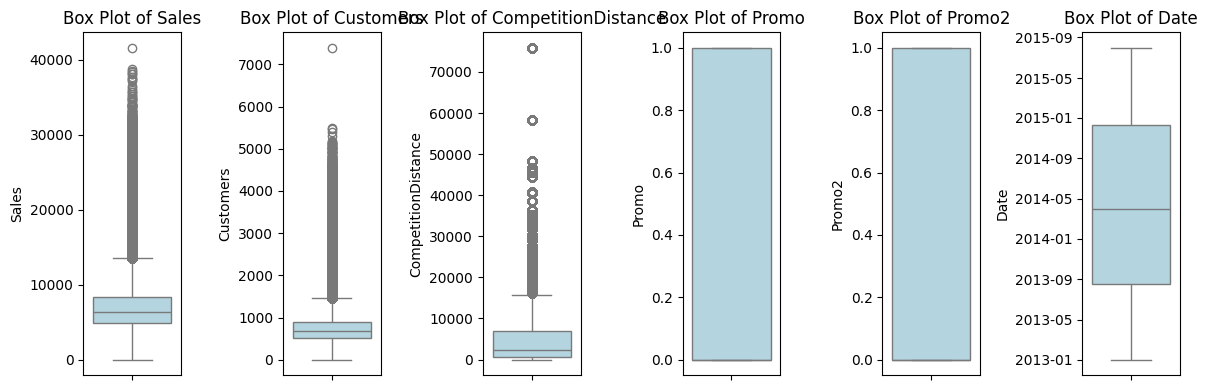

In [20]:
%matplotlib inline
cols = ['Sales', 'Customers', 'CompetitionDistance', 'Promo', 'Promo2', 'Date']
plot_outliers_boxplot(reduced_train_store_df, cols).show()

In [21]:
cleaned_df = cap_all_outliers(reduced_train_store_df, cols)

/tmp/ipykernel_15239/2283040308.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_outliers_boxplot(cleaned_df, cols).show()


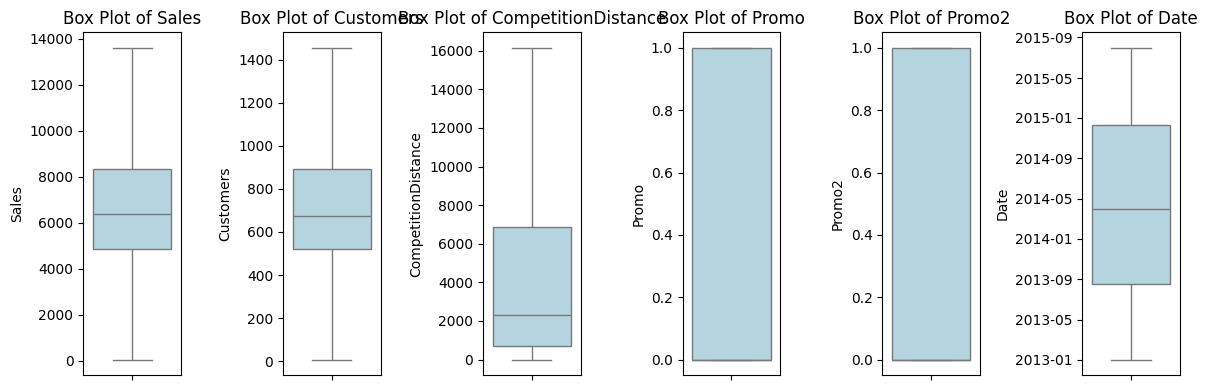

In [22]:
plot_outliers_boxplot(cleaned_df, cols).show()

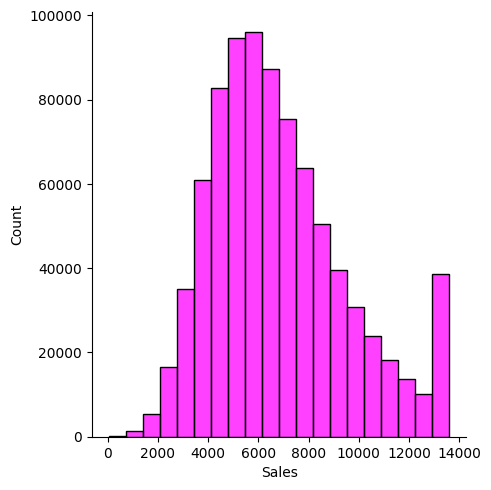

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# fig, ax = plt.subplots(figsize=(9, 8))
sns.displot(cleaned_df['Sales'], bins = 20, color = 'Magenta')
plt.show()

<Axes: xlabel='Assortment', ylabel='Count'>

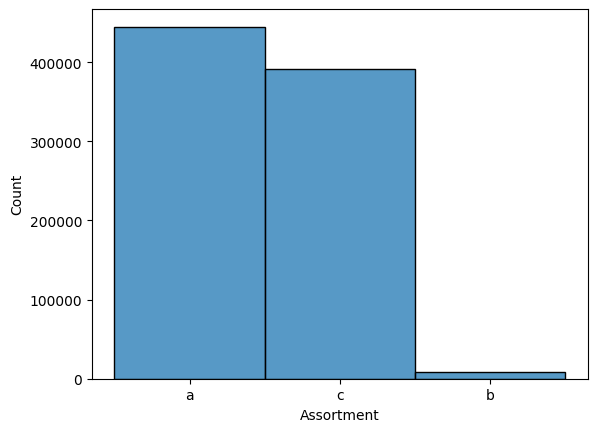

In [24]:
sns.histplot(data=cleaned_df, x='Assortment')

/tmp/ipykernel_15239/1231181295.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  scatter_plot(cleaned_df, 'Sales', 'Customers', hue_col='Promo').show()


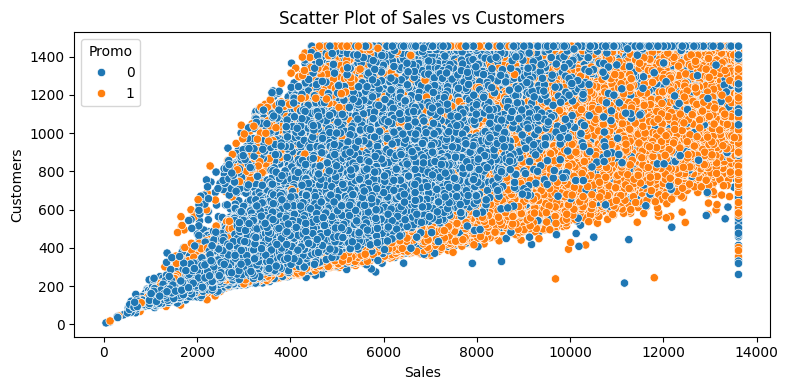

In [25]:
scatter_plot(cleaned_df, 'Sales', 'Customers', hue_col='Promo').show()

The scatter plot of **Sales vs Customers** colored by the Promo variable shows a clear positive relationship between the number of customers and sales. As the number of customers increases, sales also rise. The points are densely packed, especially between sales values from $0$ to $10,000$, and a wide range of customer values. Interestingly, the **orange points**, which represent days with promotions, seem more concentrated in higher sales and customer areas compared to the **blue points** (non-promo days), indicating that promotions lead to higher sales and attract more customers. This visualization supports the idea that promotions significantly enhance both sales and customer inflow.

<Axes: xlabel='Promo', ylabel='Sales'>

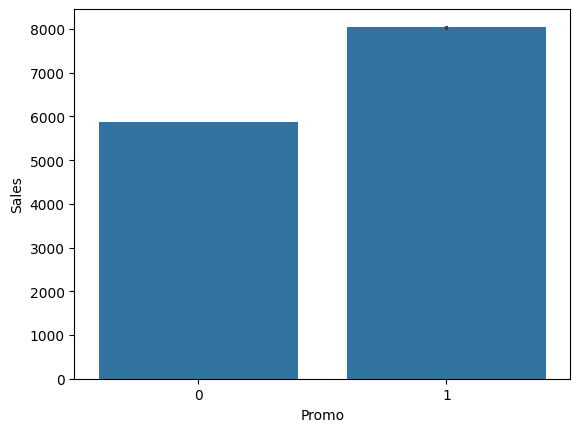

In [26]:
sns.barplot(data=cleaned_df, x='Promo', y='Sales')

<Axes: xlabel='Promo', ylabel='Customers'>

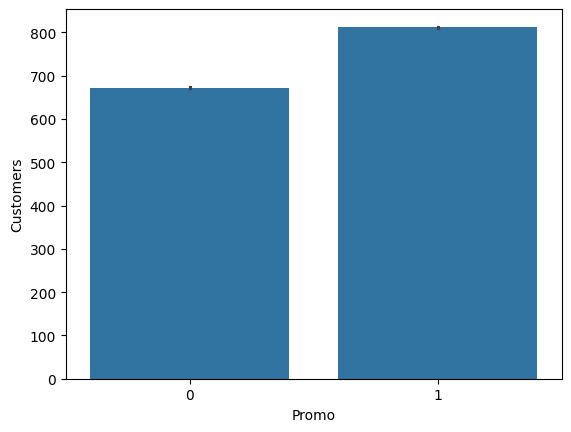

In [27]:
sns.barplot(data=cleaned_df, x='Promo', y='Customers')

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

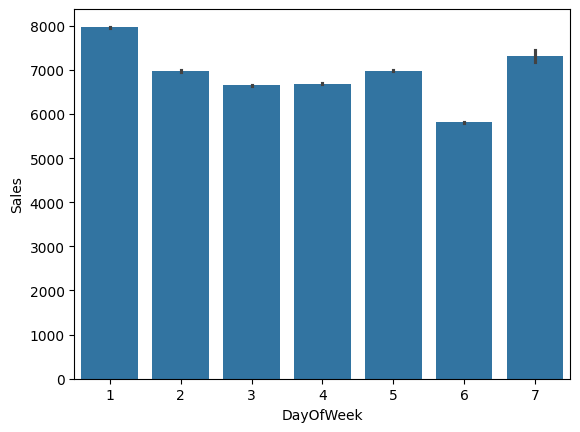

In [28]:
sns.barplot(x=cleaned_df.DayOfWeek, y=cleaned_df.Sales)

<Axes: xlabel='StateHoliday', ylabel='Sales'>

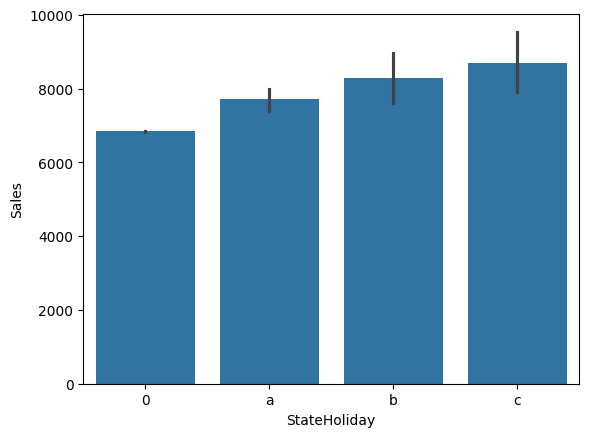

In [29]:
sns.barplot(data=cleaned_df, x='StateHoliday', y='Sales')

<Axes: xlabel='Assortment', ylabel='Sales'>

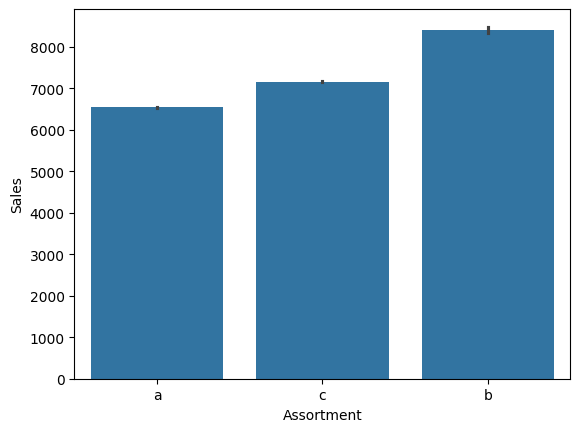

In [30]:
sns.barplot(data=cleaned_df, x='Assortment', y='Sales')

<Axes: xlabel='StoreType', ylabel='Sales'>

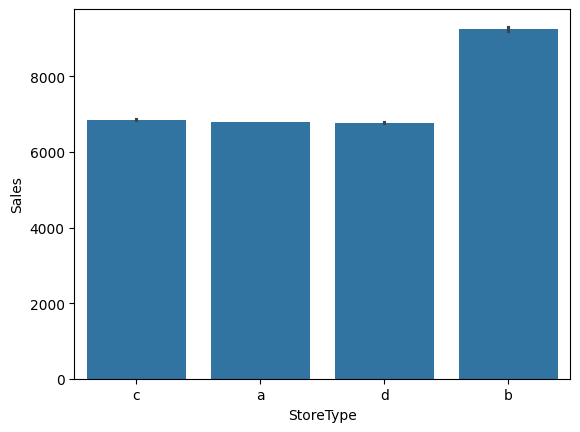

In [31]:
sns.barplot(data=cleaned_df, x='StoreType', y='Sales')

/tmp/ipykernel_15239/1317164904.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  correlation_matrix(cleaned_df, cleaned_df.select_dtypes(include=['int64', 'float64']).columns).show()


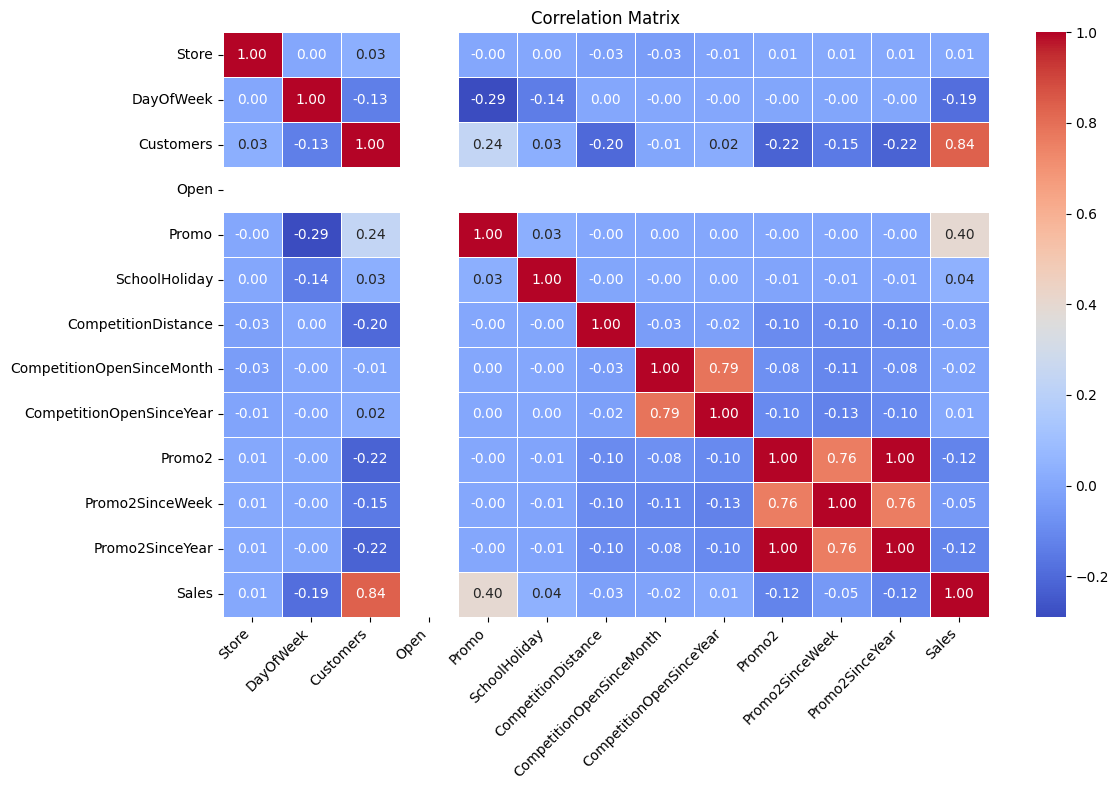

In [32]:
correlation_matrix(cleaned_df, cleaned_df.select_dtypes(include=['int64', 'float64']).columns).show()

The correlation matrix reveals that `Customers` and `Sales` have a **strong** positive correlation ($0.84$), which suggests that the number of customers is a key driver of sales. The `Promo` variable also shows a moderate positive correlation with `Sales` ($0.40$), indicating that promotional activities positively influence sales. Interestingly, the `CompetitionOpenSince` features, which indicate how long competitors have been open, show **weak** correlations with Sales, suggesting that competition might not have a strong immediate impact on Rossmann’s sales. Additionally, SchoolHoliday and DayOfWeek have relatively low correlations with sales, suggesting that these factors may not significantly influence sales patterns. This analysis suggests that focusing on customer numbers and promotional efforts could yield the most immediate improvements in sales forecasting models.

/tmp/ipykernel_15239/632276646.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_decile_pie_chart(cleaned_df, column='Sales', title_prefix='mean').show()
/tmp/ipykernel_15239/632276646.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_decile_pie_chart(cleaned_df, column='Customers', title_prefix='mean').show()


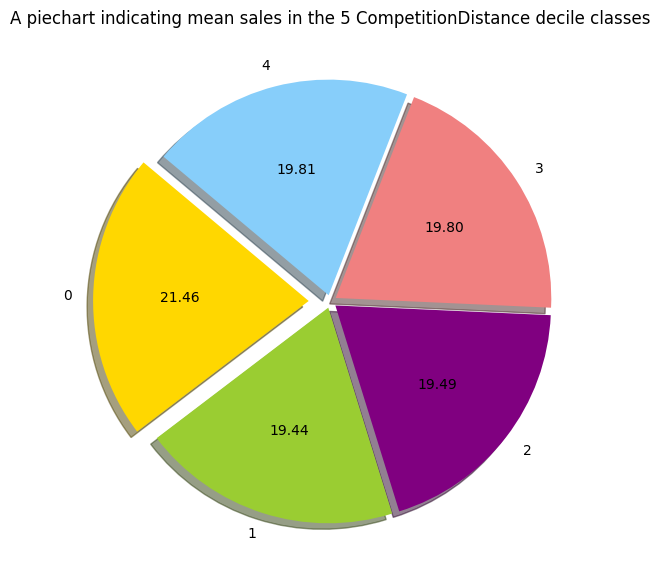

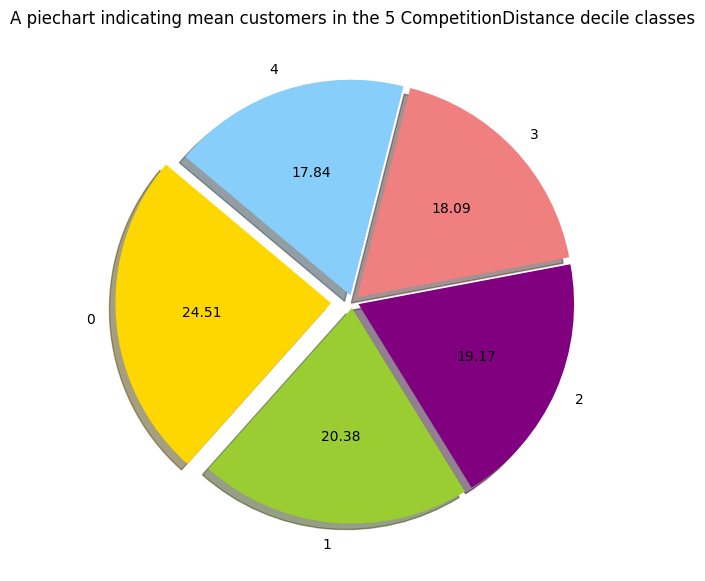

In [33]:
# For Sales
plot_decile_pie_chart(cleaned_df, column='Sales', title_prefix='mean').show()

# For Customers
plot_decile_pie_chart(cleaned_df, column='Customers', title_prefix='mean').show()

The two pie charts compare **mean sales** and **mean customers** across 5 decile classes of CompetitionDistance (i.e., how far a store’s competitors are located).

In the first chart for **mean sales**, the largest segment is for decile 0 (yellow), showing the highest **mean sales** ($21.46$). This implies that stores with the closest competition tend to have higher sales on average, possibly indicating competitive advantage through promotions or customer loyalty. Decile 3 (red) and 2 (purple) show slightly lower **mean sales** around $19.8$ and $19.49$, respectively, suggesting that stores with more distant competition do not necessarily perform better in sales.

The second chart for **mean customers** shows a similar pattern. Decile 0 (yellow) has the largest share of customers ($24.51$), confirming that stores closer to competitors attract more customers. As competition distance increases (decile 4 and beyond), the number of customers drops, with decile 4 (blue) having the lowest customer mean ($17.84$). This suggests proximity to competitors might not hurt but rather boost both customer traffic and sales.

These findings imply that stores closer to competition tend to experience both higher sales and customer inflows, contradicting the assumption that increased competition automatically leads to fewer customers or lower sales.

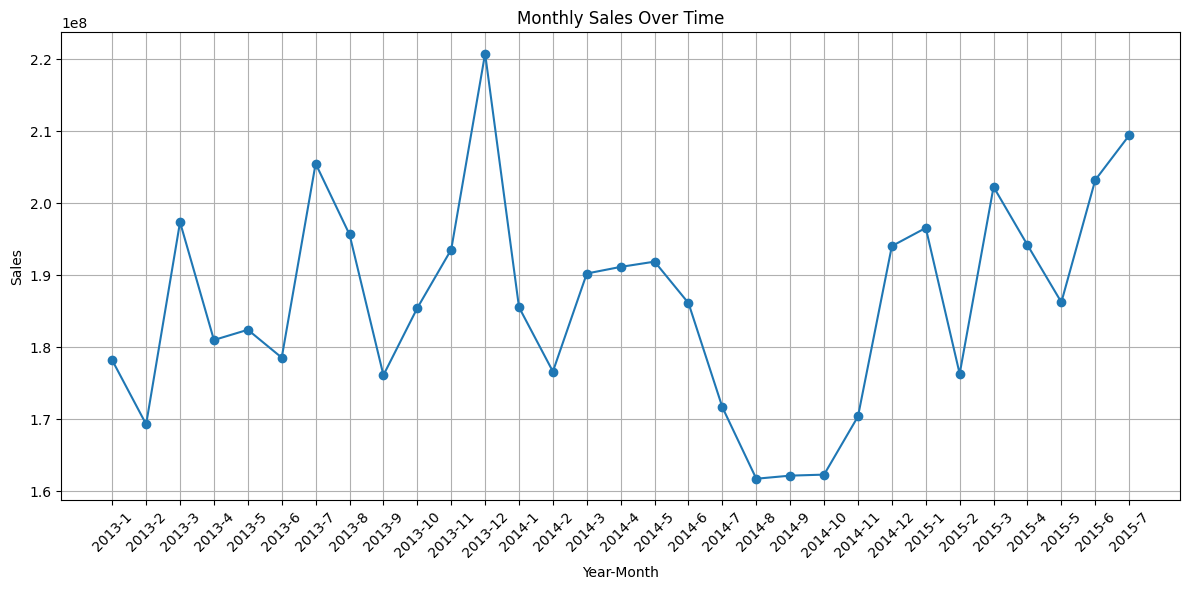

In [34]:
# Visualizing sales for each month over time
# Grouping by year and month, and summing up the sales for each group
monthly_sales = cleaned_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

The sales data shows clear seasonality, with spikes around December each year, likely due to holiday-driven demand, while the sharp decline between August 2014 and March 2015 suggests external challenges, possibly economic or operational. However, sales gradually recover after this dip, showing resilience and an upward trend through mid-2015. Understanding the reasons behind these fluctuations, particularly the seasonal peaks and prolonged dip, could offer valuable insights for optimizing future sales strategies and addressing any recurring challenges.

In [35]:
# Save the cleaned data to csv for future analysis
cleaned_df.to_csv('../data/cleaned_train_data.csv')